<a href="https://colab.research.google.com/github/deepankar5/Autoencoder-with-keras/blob/master/autoencoder_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

encoding_dim = 32

input_img = keras.Input(shape = (784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [2]:
#encoder model

encoder = keras.Model(input_img, encoded)

In [3]:
# decoder model

encoder_input = keras.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoder_input, decoder_layer(encoder_input))

In [4]:
#model will do per pixel binary crossentropy with adam

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
#normalise the each pixel
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

#reshaping in (n, 28x28) = (n, 784)
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape, X_test.shape)


(60000, 784) (10000, 784)


In [7]:
autoencoder.fit(X_train, X_train, batch_size= 256, epochs= 50, verbose= 2, shuffle= True, validation_data=(X_test, X_test))

Epoch 1/50
235/235 - 3s - loss: 0.2756 - val_loss: 0.1887
Epoch 2/50
235/235 - 2s - loss: 0.1708 - val_loss: 0.1541
Epoch 3/50
235/235 - 2s - loss: 0.1454 - val_loss: 0.1352
Epoch 4/50
235/235 - 2s - loss: 0.1297 - val_loss: 0.1221
Epoch 5/50
235/235 - 2s - loss: 0.1190 - val_loss: 0.1133
Epoch 6/50
235/235 - 2s - loss: 0.1118 - val_loss: 0.1076
Epoch 7/50
235/235 - 2s - loss: 0.1068 - val_loss: 0.1033
Epoch 8/50
235/235 - 2s - loss: 0.1030 - val_loss: 0.1001
Epoch 9/50
235/235 - 2s - loss: 0.1001 - val_loss: 0.0976
Epoch 10/50
235/235 - 2s - loss: 0.0980 - val_loss: 0.0959
Epoch 11/50
235/235 - 2s - loss: 0.0966 - val_loss: 0.0947
Epoch 12/50
235/235 - 2s - loss: 0.0957 - val_loss: 0.0940
Epoch 13/50
235/235 - 2s - loss: 0.0951 - val_loss: 0.0935
Epoch 14/50
235/235 - 2s - loss: 0.0947 - val_loss: 0.0932
Epoch 15/50
235/235 - 2s - loss: 0.0944 - val_loss: 0.0929
Epoch 16/50
235/235 - 2s - loss: 0.0941 - val_loss: 0.0927
Epoch 17/50
235/235 - 2s - loss: 0.0939 - val_loss: 0.0925
Epoch 

In [8]:
encoder_imgs = encoder.predict(X_test)
decoder_imgs = decoder.predict(encoder_imgs)

In [9]:
import matplotlib.pyplot as plt

def plot_decode_images(decoder_array):
  n = 10  # How many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoder_array[i].reshape(28, 28), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()



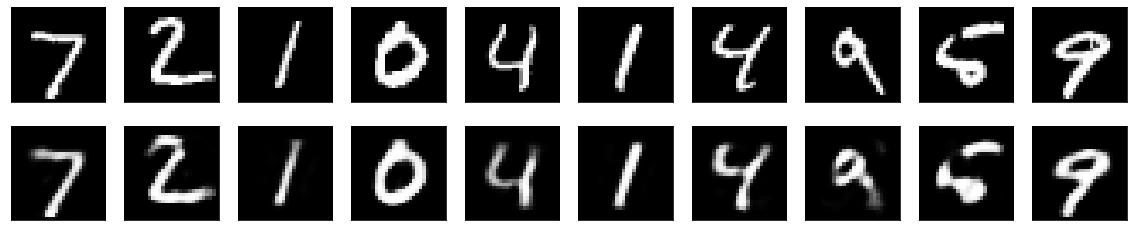

In [10]:
plot_decode_images(decoder_imgs)

In [83]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [84]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [85]:
autoencoder.fit(X_train, X_train, batch_size= 256, epochs= 100, verbose= 2, shuffle= True, validation_data=(X_test, X_test), use_multiprocessing= True)

Epoch 1/100
235/235 - 3s - loss: 0.2829 - val_loss: 0.1930
Epoch 2/100
235/235 - 2s - loss: 0.1755 - val_loss: 0.1592
Epoch 3/100
235/235 - 2s - loss: 0.1512 - val_loss: 0.1418
Epoch 4/100
235/235 - 2s - loss: 0.1373 - val_loss: 0.1308
Epoch 5/100
235/235 - 2s - loss: 0.1282 - val_loss: 0.1234
Epoch 6/100
235/235 - 2s - loss: 0.1216 - val_loss: 0.1177
Epoch 7/100
235/235 - 2s - loss: 0.1167 - val_loss: 0.1134
Epoch 8/100
235/235 - 2s - loss: 0.1130 - val_loss: 0.1104
Epoch 9/100
235/235 - 2s - loss: 0.1105 - val_loss: 0.1083
Epoch 10/100
235/235 - 2s - loss: 0.1088 - val_loss: 0.1068
Epoch 11/100
235/235 - 2s - loss: 0.1075 - val_loss: 0.1058
Epoch 12/100
235/235 - 2s - loss: 0.1066 - val_loss: 0.1050
Epoch 13/100
235/235 - 2s - loss: 0.1059 - val_loss: 0.1043
Epoch 14/100
235/235 - 2s - loss: 0.1053 - val_loss: 0.1038
Epoch 15/100
235/235 - 2s - loss: 0.1048 - val_loss: 0.1033
Epoch 16/100
235/235 - 2s - loss: 0.1043 - val_loss: 0.1029
Epoch 17/100
235/235 - 2s - loss: 0.1039 - val_lo

In [86]:
#encoder model

encoder = keras.Model(input_img, encoded)

encoder_imgs_1 = encoder.predict(X_test)
decoder_imgs_1 = autoencoder.predict(X_test)

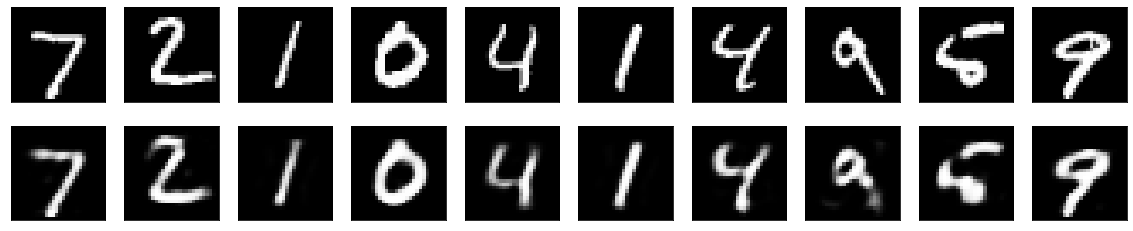

In [87]:
plot_decode_images(decoder_imgs_1)

In [88]:
encoder_imgs_1.mean()

1.2674607

In [26]:
# deep encoders

input_img  = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


In [29]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3335 - val_loss: 0.1656
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1571 - val_loss: 0.1347
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1322 - val_loss: 0.1204
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1203 - val_loss: 0.1153
Epoch 5/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1148 - val_loss: 0.1103
Epoch 6/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1107 - val_loss: 0.1065
Epoch 7/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1072 - val_loss: 0.1037
Epoch 8/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1044 - val_loss: 0.1015
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1021 - val_loss: 0.0995
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.100

In [77]:
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               101

In [78]:
encoder_model = keras.Model(input_img, encoded)

encoder_model.summary()

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [80]:
encoded_images = encoder_model.predict(X_test)
decoded_images = autoencoder.predict(X_test)

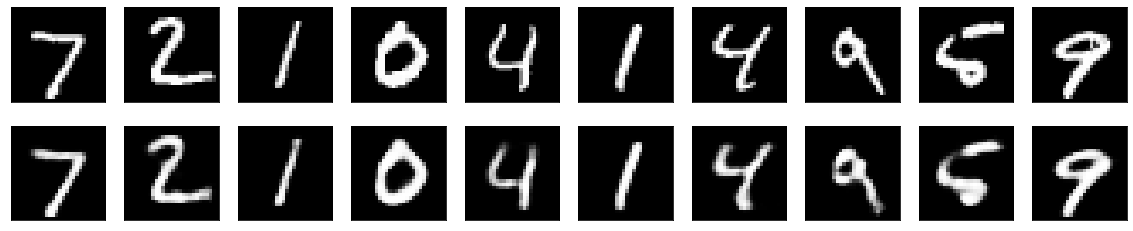

In [81]:
plot_decode_images(decoded_images)

In [82]:
encoded_images.mean()

7.675501

In [96]:
#convolution autoencoder

import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [97]:
autoencoder.summary()

Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 8)           0  

In [98]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 79s 167ms/step - loss: 0.2249 - val_loss: 0.1470
Epoch 2/50
469/469 [==============================] - 78s 167ms/step - loss: 0.1366 - val_loss: 0.1271
Epoch 3/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1239 - val_loss: 0.1190
Epoch 4/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1177 - val_loss: 0.1144
Epoch 5/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1139 - val_loss: 0.1108
Epoch 6/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1110 - val_loss: 0.1085
Epoch 7/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1090 - val_loss: 0.1068
Epoch 8/50
 46/469 [=>............................] - ETA: 1:06 - loss: 0.1078